In [1]:
! python3 -m pip install matplotlib networkx pyvipr > /dev/null
! date

Sat 11 Dec 2021 02:03:32 PM UTC


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pyvipr.network_viz as nviz

# FRA-knäck 3: Lös analytiker-testet

Dags att lösa FRA-knäck 3: Lös analytiker-testet. Det här är en för mig ny typ av utmaning så ska bli intressant att göra den. Släpper nu mitt användande av terminalen för att kunna göra en graf. Uppgiften finns på FRAs [nyhetssidor](https://www.fra.se/cyberforsvar/nyheter/nyhetsarkiv/news/fraknack3losanalytikertestet.5.3421f87617d5c90b18228.html) och vår uppgift är att utifrån nedan information om vem som ringer vem svara på ett antal frågor. 

## Följande frågor ska besvaras

Fråga 1: Vem är chef för organisationen?

Fråga 2: Vem är den troligaste ställföreträdaren till chefen?

Fråga 3: I hur många städer finns lokalgrupper?

Fråga 4: Vilka två terrorister sammanbor troligtvis?

Till vår hjälp har vi följande information om vem som ringer vem:
<pre>
A ringer till G, H och K 
B ringer till C, D och M 
C ringer till B och D 
D ringer till B, C och M 
E ringer till B, G och J 
F ringer till I, J och L 
G ringer till A, E, H och K 
H ringer till A, G och K 
I ringer till F, J och L 
J ringer till F, I och L 
K ringer till A, G och H 
L ringer till F, I och J 
M ringer till B och D
</pre>

Låt oss lösa uppgiften genom att skapa en graf som visar vem som ringer vem med riktning på pilar.

In [3]:
# Definiera relationerna först så vi har de.
relations = [('A', 'G', 'calls'),
             ('A', 'H', 'calls'),
             ('A', 'K', 'calls'),
             ('B', 'C', 'calls'),
             ('B', 'D', 'calls'),
             ('B', 'M', 'calls'),
             ('C', 'B', 'calls'),
             ('C', 'D', 'calls'),
             ('D', 'B', 'calls'),
             ('D', 'C', 'calls'),
             ('D', 'M', 'calls'),
             ('E', 'B', 'calls'),
             ('E', 'G', 'calls'),
             ('E', 'J', 'calls'),
             ('F', 'I', 'calls'),
             ('F', 'J', 'calls'),
             ('F', 'L', 'calls'),
             ('G', 'A', 'calls'),
             ('G', 'E', 'calls'),
             ('G', 'H', 'calls'),
             ('G', 'K', 'calls'),
             ('H', 'A', 'calls'),
             ('H', 'G', 'calls'),
             ('H', 'K', 'calls'),
             ('I', 'F', 'calls'),
             ('I', 'J', 'calls'),
             ('I', 'L', 'calls'),
             ('J', 'F', 'calls'),
             ('J', 'I', 'calls'),
             ('J', 'L', 'calls'),
             ('K', 'A', 'calls'),
             ('K', 'G', 'calls'),
             ('K', 'H', 'calls'),
             ('L', 'F', 'calls'),
             ('L', 'I', 'calls'),
             ('L', 'J', 'calls'),
             ('M', 'B', 'calls'),
             ('M', 'D', 'calls'),
            ]

In [4]:
# Gör en graf
G = nx.MultiDiGraph()

for i in relations:
    G.add_edge(i[0], i[1], relation = i[2])

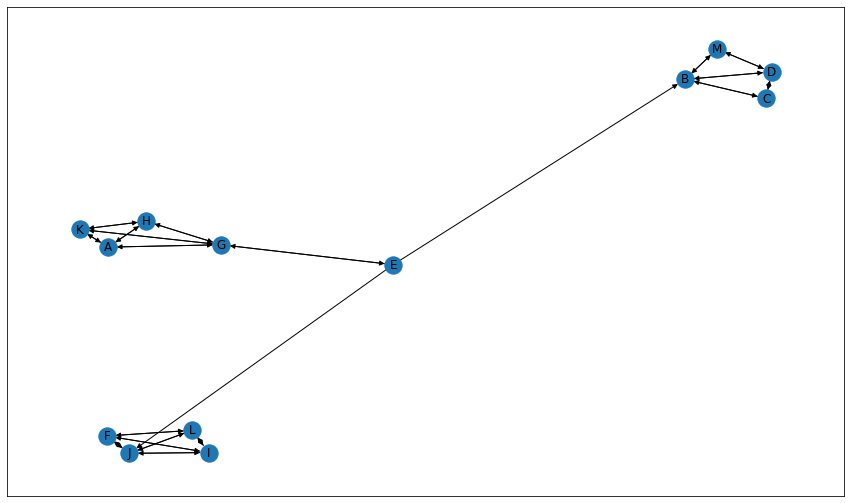

In [5]:
# Rita en statisk version av grafen
plt.figure(figsize =(15, 9))
nx.draw_networkx(G)

## Svar

### Fråga 1

Min bedömning är att **E** är chef. **E** ringer till **B**, **G** och **J** men endast **G** ringer till **E**.

### Fråga 2

Troligen är **G** ställföreträdare då **G** är den enda som ringer **E**.

### Fråga 3

Organisationen har tre kluster vilket troligen är tre celler som kan vara placerade i tre städer.

### Fråga 4

Troligen bor **C** och **M** tillsammans då de två inte ringer varandra i sitt kluster. De pratar endast när de är tillsammans för att minska risken för upptäckt.

In [6]:
# Dynamisk graf
#! jupyter labextension install @jupyter-widgets/jupyterlab-manager > /dev/null
#! jupyter labextension install pyvipr > /dev/null
#! jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet > /dev/null
# Spara data för grafen till en fil
#nx.write_gexf(G, 'data.gexf')
# Rita en dynamisk graf
#nviz.gexf_view('data.gexf', layout_name='cola')